In [1]:
from Simulator import Simulator
import numpy as np
from scipy import misc 
import matplotlib.pyplot as plt
import numpy.core.defchararray as npstr
%matplotlib inline

In [36]:
A = np.zeros((50,50))
nx=A.shape[0];ny=A.shape[0];nt=10000;                      # Fundamental simulation parameters
T = np.zeros((nx,ny))                                      # Initialize T field
T[int(nx/2):int(nx/2+2),int(ny/2):int(ny/2+3)] = 1000      # Increase temperature in the middle of the grid
#F = np.random.normal(loc=500, scale=0, size=(nx,ny))
F = np.full((nx,ny), 500.)

Simulation took 1.9031929969787598 seconds.
Simulation took 2.035616397857666 seconds.
Simulation took 2.035750389099121 seconds.
Simulation took 2.0107178688049316 seconds.
Simulation took 2.090298652648926 seconds.
Simulation took 2.060338020324707 seconds.
Simulation took 1.923119306564331 seconds.
Simulation took 1.973163366317749 seconds.
Simulation took 1.9306883811950684 seconds.
Simulation took 1.995908498764038 seconds.
Simulation took 2.159336566925049 seconds.
Simulation took 2.0724117755889893 seconds.
Simulation took 1.9629158973693848 seconds.
Simulation took 1.97605299949646 seconds.
Simulation took 1.952810287475586 seconds.
Simulation took 1.8306632041931152 seconds.
Simulation took 0.8429915904998779 seconds.
Simulation took 0.4487311840057373 seconds.
Simulation took 0.2641162872314453 seconds.
Simulation took 0.15484309196472168 seconds.
Simulation took 0.09638285636901855 seconds.
Simulation took 1.9706146717071533 seconds.
Simulation took 1.9469389915466309 second

Simulation took 0.10291671752929688 seconds.
Simulation took 2.1275246143341064 seconds.
Simulation took 3.436845302581787 seconds.
Simulation took 2.5279786586761475 seconds.
Simulation took 1.9905519485473633 seconds.
Simulation took 2.0068705081939697 seconds.
Simulation took 1.9765324592590332 seconds.
Simulation took 2.0865089893341064 seconds.
Simulation took 2.1083555221557617 seconds.
Simulation took 1.9728796482086182 seconds.
Simulation took 2.0187556743621826 seconds.
Simulation took 2.089038372039795 seconds.
Simulation took 2.1012537479400635 seconds.
Simulation took 1.9552087783813477 seconds.
Simulation took 1.987912654876709 seconds.
Simulation took 1.9519834518432617 seconds.
Simulation took 1.4648594856262207 seconds.
Simulation took 0.7801632881164551 seconds.
Simulation took 0.4400901794433594 seconds.
Simulation took 0.25517916679382324 seconds.
Simulation took 0.15358471870422363 seconds.
Simulation took 0.09617114067077637 seconds.
Simulation took 1.9639184474945

Simulation took 0.12268805503845215 seconds.
Simulation took 0.07991623878479004 seconds.
Simulation took 1.125929355621338 seconds.
Simulation took 1.1091690063476562 seconds.
Simulation took 1.1245145797729492 seconds.
Simulation took 1.1151018142700195 seconds.
Simulation took 1.1857750415802002 seconds.
Simulation took 1.1657896041870117 seconds.
Simulation took 1.169600486755371 seconds.
Simulation took 1.078495979309082 seconds.
Simulation took 1.0422143936157227 seconds.
Simulation took 0.987252950668335 seconds.
Simulation took 0.9265856742858887 seconds.
Simulation took 0.8436567783355713 seconds.
Simulation took 0.7439866065979004 seconds.
Simulation took 0.650371789932251 seconds.
Simulation took 0.5290405750274658 seconds.
Simulation took 0.42937707901000977 seconds.
Simulation took 0.3273138999938965 seconds.
Simulation took 0.24286437034606934 seconds.
Simulation took 0.17378687858581543 seconds.
Simulation took 0.12194132804870605 seconds.
Simulation took 0.0820732116699

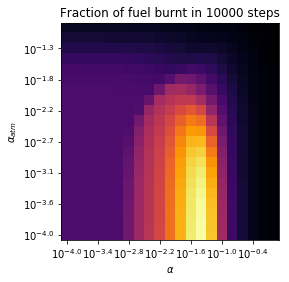

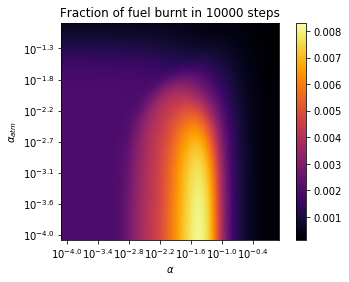

In [3]:
nt=10000
planarX = np.logspace(-4,0,21)
atmosX = np.logspace(-4,-1,21)

results1 = np.zeros((len(atmosX), len(planarX)))
dead1 = np.zeros((len(atmosX), len(planarX)), dtype=bool)

for i in range(len(atmosX)):
    for j in range(len(planarX)):
        for k in range(1):
            #F = np.random.normal(loc=500, scale=0, size=(nx,ny))
            sim = Simulator(nx,ny,nt,T=T.copy(),A=A.copy(),F=F.copy(),H=np.zeros((nx,ny)), dt=0.01,
                            Tcrit=100,
                            burningRate=0.02,
                            heatContent=90,
                            planarDiffusivity=planarX[j],
                            atmosphericDiffusivity=atmosX[i],
                            slopeContribution=1)        # Initialize fields and parameters
            sim.Run(animStep=0)                                   # Perform the simulation
            results1[i,j] += sim.Metrics()['totalBurnt']
            dead1[i,j] = sim.Metrics()['burning']
            #print(sim.Metrics()['burntFuel'])
            #print(sim.Metrics()['dead'])
            #print(sim.Metrics()['burntStep'][-10:])

            print((i*len(planarX) + j + 1)/(len(planarX) * len(atmosX))*100, '%', end='\r')

print(dead1)

cmap = 'inferno'
img = plt.imshow(results1/1, cmap=cmap, origin='lower', interpolation=None)

skip = 3
plt.yticks(range(0,len(atmosX), skip) , npstr.add(npstr.add('$10^{', np.around(np.log10(atmosX[::skip]),decimals=1).astype(str)), '}$'))
plt.xticks(range(0,len(planarX), skip), npstr.add(npstr.add('$10^{', np.around(np.log10(planarX[::skip]),decimals=1).astype(str)), '}$'))
plt.ylabel(r'$\alpha_{atm}$')
plt.xlabel(r'$\alpha$')
plt.title('Fraction of fuel burnt in {} steps'.format(nt))

plt.savefig('plots/planar_vs_atmos_nointerpol.png')

plt.show()

cmap = plt.cm.get_cmap('inferno')
img = plt.imshow(results1/1, cmap=cmap, origin='lower', interpolation='bicubic')

plt.colorbar(img)
#plt.clim(0, 1)
skip = 3
plt.yticks(range(0,len(atmosX), skip) , npstr.add(npstr.add('$10^{', np.around(np.log10(atmosX[::skip]),decimals=1).astype(str)), '}$'))
plt.xticks(range(0,len(planarX), skip), npstr.add(npstr.add('$10^{', np.around(np.log10(planarX[::skip]),decimals=1).astype(str)), '}$'))
plt.ylabel(r'$\alpha_{atm}$')
plt.xlabel(r'$\alpha$')
plt.title('Fraction of fuel burnt in {} steps'.format(nt))

plt.savefig('plots/planar_vs_atmos.png')

plt.show()

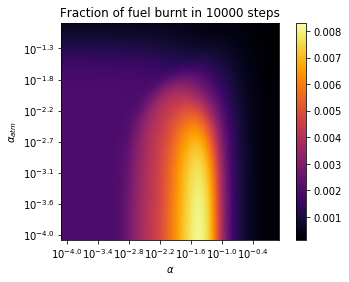

In [12]:
#plt.figure(figsize=(10,8))
nt=10000
cmap = plt.cm.get_cmap('inferno')
img = plt.imshow(results1/1, cmap=cmap, origin='lower', interpolation='bicubic')

plt.colorbar(img)
#plt.clim(0, 1)
skip = 3
plt.yticks(range(0,len(atmosX), skip) , npstr.add(npstr.add('$10^{', np.around(np.log10(atmosX[::skip]),decimals=1).astype(str)), '}$'))
plt.xticks(range(0,len(planarX), skip), npstr.add(npstr.add('$10^{', np.around(np.log10(planarX[::skip]),decimals=1).astype(str)), '}$'))
plt.ylabel(r'$\alpha_{atm}$')
plt.xlabel(r'$\alpha$')
plt.title('Fraction of fuel burnt in {} steps'.format(nt))

plt.savefig('plots/planar_vs_atmos.pdf')

plt.show()

Simulation took 5.660524129867554 seconds.
Simulation took 7.184467315673828 seconds.
Simulation took 7.100939989089966 seconds.
Simulation took 7.075955867767334 seconds.
Simulation took 7.594193458557129 seconds.
Simulation took 5.869500160217285 seconds.
Simulation took 8.148100137710571 seconds.
Simulation took 8.022738695144653 seconds.
Simulation took 7.794119834899902 seconds.
Simulation took 8.264253377914429 seconds.
Simulation took 5.8779919147491455 seconds.
Simulation took 9.26888632774353 seconds.
Simulation took 9.512626647949219 seconds.
Simulation took 9.937194347381592 seconds.
Simulation took 9.543545961380005 seconds.
Simulation took 6.178133249282837 seconds.
Simulation took 9.780584812164307 seconds.
Simulation took 9.82560396194458 seconds.
Simulation took 9.770344257354736 seconds.
Simulation took 10.371596813201904 seconds.
Simulation took 6.65254282951355 seconds.
Simulation took 10.152915477752686 seconds.
Simulation took 9.929239988327026 seconds.
Simulation 

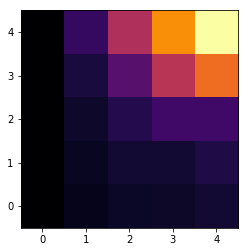

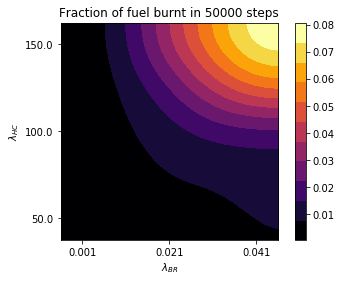

In [5]:
nt=50000

burnX = np.linspace(0.001,0.041,5)
heatX = np.linspace(50,150,5)

results2 = np.zeros((len(heatX), len(burnX)))
dead2 = np.zeros((len(heatX), len(burnX)), dtype=bool)

for i in range(len(heatX)):
    for j in range(len(burnX)):
        for k in range(1):
            #F = np.random.normal(loc=500, scale=0, size=(nx,ny))
            sim = Simulator(nx,ny,nt,T=T.copy(),A=A.copy(),F=F.copy(),H=np.zeros((nx,ny)), dt=0.01,
                            Tcrit=100,
                            burningRate=burnX[j],
                            heatContent=heatX[i],
                            planarDiffusivity=0.005,
                            atmosphericDiffusivity=.004,
                            slopeContribution=1)        # Initialize fields and parameters
            sim.Run(animStep=0)                                   # Perform the simulation
            results2[i,j] += sim.Metrics()['totalBurnt']
            dead2[i,j] = sim.Metrics()['burning']
            #print(sim.Metrics()['burntFuel'])
            #print(sim.Metrics()['dead'])
            #print(sim.Metrics()['burntStep'][-10:])
            print((i*len(burnX) + j + 1)/(len(burnX) * len(heatX))*100, '%', end='\r')

print(dead2)

cmap = 'inferno'
img = plt.imshow(results2/1, cmap=cmap, origin='lower', interpolation=None)

plt.show()

cmap = plt.cm.get_cmap('inferno', 11)
img = plt.imshow(results2/1, cmap=cmap, origin='lower', interpolation='bicubic')

plt.colorbar(img)
#plt.clim(0, 1)
skip = 2
plt.yticks(range(0,len(heatX), skip)      , heatX[::skip])
plt.xticks(range(0,len(burnX), skip), burnX[::skip])
plt.ylabel('$\lambda_{HC}$')
plt.xlabel('$\lambda_{BR}$')
plt.title('Fraction of fuel burnt in {} steps'.format(nt))

plt.savefig('plots/BR_vs_HC.png')

plt.show()
#sim.Show()                                  # Visualize the results

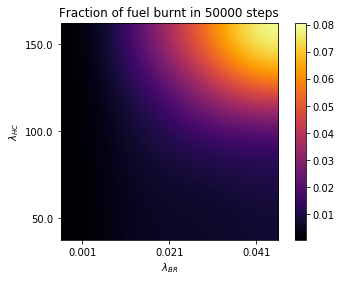

In [13]:
nt=50000
#plt.figure(figsize=(10,8))
cmap = plt.cm.get_cmap('inferno')
img = plt.imshow(results2/1, cmap=cmap, origin='lower', interpolation='bicubic')

plt.colorbar(img)
#plt.clim(0, 1)
skip = 2
plt.yticks(range(0,len(heatX), skip)      , heatX[::skip])
plt.xticks(range(0,len(burnX), skip), burnX[::skip])
plt.ylabel('$\lambda_{HC}$')
plt.xlabel('$\lambda_{BR}$')
plt.title('Fraction of fuel burnt in {} steps'.format(nt))

plt.savefig('plots/BR_vs_HC.pdf')

plt.show()

Simulation took 5.379973649978638 seconds.
Simulation took 6.054738283157349 seconds.
Simulation took 6.0522377490997314 seconds.
Simulation took 6.0294530391693115 seconds.
Simulation took 6.016343593597412 seconds.
Simulation took 5.951194763183594 seconds.
Simulation took 6.2556867599487305 seconds.
Simulation took 6.1975417137146 seconds.
Simulation took 6.275070667266846 seconds.
Simulation took 6.256105661392212 seconds.
Simulation took 5.993975400924683 seconds.
Simulation took 6.040998697280884 seconds.
Simulation took 5.996894121170044 seconds.
Simulation took 5.964093446731567 seconds.
Simulation took 5.976715087890625 seconds.
Simulation took 5.987229824066162 seconds.
Simulation took 6.006444692611694 seconds.
Simulation took 6.024883985519409 seconds.
Simulation took 6.038431167602539 seconds.
Simulation took 6.089609861373901 seconds.
Simulation took 5.9950995445251465 seconds.
Simulation took 6.052222013473511 seconds.
Simulation took 6.209625244140625 seconds.
Simulatio

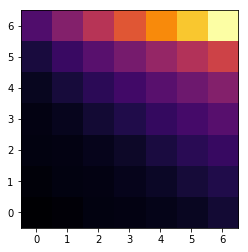

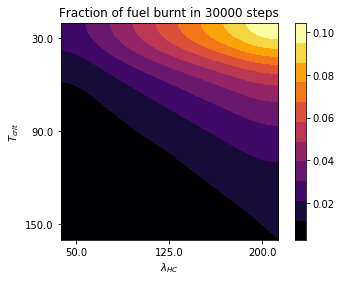

In [8]:
nt=30000

heatContentX = np.linspace(50,200,7)
TcritX = np.linspace(150,30,7)

results3 = np.zeros((len(TcritX), len(heatContentX)))
dead3 = np.zeros((len(TcritX), len(heatContentX)), dtype=bool)

for i in range(len(TcritX)):
    for j in range(len(heatContentX)):
        for k in range(1):
            #F = np.random.normal(loc=500, scale=0, size=(nx,ny))
            sim = Simulator(nx,ny,nt,T=T.copy(),A=A.copy(),F=F.copy(),H=np.zeros((nx,ny)), dt=0.01,
                            Tcrit=TcritX[i],
                            burningRate=0.02,
                            heatContent=heatContentX[j],
                            planarDiffusivity=0.005,
                            atmosphericDiffusivity=0.004,
                            slopeContribution=1)        # Initialize fields and parameters
            sim.Run(animStep=0)                                   # Perform the simulation
            results3[i,j] += sim.Metrics()['totalBurnt']
            dead3[i,j] = sim.Metrics()['burning']
            #print(sim.Metrics()['burntFuel'])
            #print(sim.Metrics()['dead'])
            #print(sim.Metrics()['burntStep'][-10:])
            print((i*len(heatContentX) + j + 1)/(len(heatContentX) * len(TcritX))*100, '%', end='\r')

print(dead3)

cmap = 'inferno'
img = plt.imshow(results3/1, cmap=cmap, origin='lower', interpolation=None)

plt.show()

cmap = plt.cm.get_cmap('inferno', 11)
img = plt.imshow(results3/1, cmap=cmap, origin='lower', interpolation='bicubic')

plt.colorbar(img)
#plt.clim(0, 1)
skip = 3
plt.yticks(range(0,len(TcritX), skip)      , TcritX[::skip])
plt.xticks(range(0,len(heatContentX), skip), heatContentX[::skip])
plt.ylabel('$T_{crit}$')
plt.xlabel('$\lambda_{HC}$')
plt.title('Fraction of fuel burnt in {} steps'.format(nt))

plt.savefig('plots/Tcrit_vs_HC.png')

plt.show()

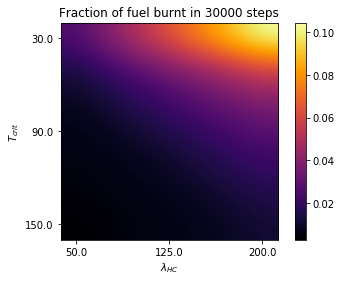

In [9]:
nt=30000
cmap = plt.cm.get_cmap('inferno')
img = plt.imshow(results3/1, cmap=cmap, origin='lower', interpolation='bicubic')

plt.colorbar(img)
#plt.clim(0, 1)
skip = 3
plt.yticks(range(0,len(TcritX), skip)      , TcritX[::skip])
plt.xticks(range(0,len(heatContentX), skip), heatContentX[::skip])
plt.ylabel('$T_{crit}$')
plt.xlabel('$\lambda_{HC}$')
plt.title('Fraction of fuel burnt in {} steps'.format(nt))

plt.savefig('plots/Tcrit_vs_HC.pdf')

plt.show()

Simulation took 5.953632593154907 seconds.
Simulation took 5.9495689868927 seconds.
Simulation took 5.916278600692749 seconds.
Simulation took 5.8411736488342285 seconds.
Simulation took 5.852107524871826 seconds.
Simulation took 5.855094909667969 seconds.
Simulation took 5.888086795806885 seconds.
Simulation took 6.007951736450195 seconds.
Simulation took 5.957744359970093 seconds.
Simulation took 5.92958927154541 seconds.
Simulation took 6.027747392654419 seconds.
Simulation took 6.354594707489014 seconds.
Simulation took 6.233335018157959 seconds.
Simulation took 6.492193698883057 seconds.
Simulation took 6.368485689163208 seconds.
Simulation took 6.250121593475342 seconds.
Simulation took 6.29009747505188 seconds.
Simulation took 6.332274913787842 seconds.
Simulation took 6.332870244979858 seconds.
Simulation took 6.190746307373047 seconds.
Simulation took 7.816595554351807 seconds.
Simulation took 8.132380485534668 seconds.
Simulation took 7.586012363433838 seconds.
Simulation too

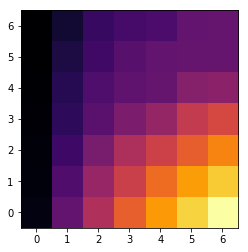

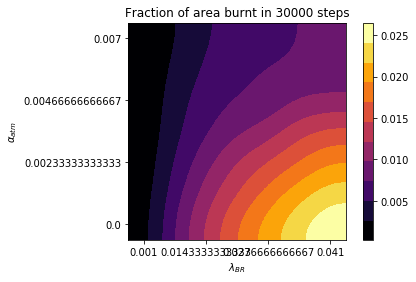

In [29]:
nt=30000
burnX = np.linspace(0.001, 0.041, 7)
atmosX = np.linspace(0, 0.007, 7)

results4 = np.zeros((len(atmosX), len(burnX)))
dead4 = np.zeros((len(atmosX), len(burnX)), dtype=bool)

for i in range(len(atmosX)):
    for j in range(len(burnX)):
        for k in range(1):
            F = np.random.normal(loc=500, scale=0, size=(nx,ny))
            sim = Simulator(nx,ny,nt,T=T.copy(),A=A.copy(),F=F.copy(),H=np.zeros((nx,ny)), dt=0.01,
                            Tcrit=100,
                            burningRate=burnX[j],
                            heatContent=90,
                            planarDiffusivity=0.005,
                            atmosphericDiffusivity=atmosX[i],
                            slopeContribution=1)        # Initialize fields and parameters
            sim.Run(animStep=0)                                   # Perform the simulation
            results4[i,j] += sim.Metrics()['totalBurnt']
            dead4[i,j] = sim.Metrics()['burning']
            #print(sim.Metrics()['burntFuel'])
            #print(sim.Metrics()['dead'])
            #print(sim.Metrics()['burntStep'][-10:])
            print((i*len(burnX) + j + 1)/(len(burnX) * len(atmosX))*100, '%', end='\r')

print(dead4)

cmap = 'inferno'
img = plt.imshow(results4/1, cmap=cmap, origin='lower', interpolation=None)

plt.show()

cmap = plt.cm.get_cmap('inferno', 11)
img = plt.imshow(results4/1, cmap=cmap, origin='lower', interpolation='bicubic')

plt.colorbar(img)
skip = 2
plt.xticks(range(0,len(burnX), skip) , burnX[::skip])
#plt.yticks(range(0,len(atmosX), skip) , npstr.add(npstr.add('$10^{', np.log10(atmosX[::skip]).astype(str)), '}$'))
plt.yticks(range(0,len(atmosX), skip),atmosX[::skip])
plt.xlabel('$\lambda_{BR}$')
plt.ylabel(r'$\alpha_{atm}$')
plt.title('Fraction of area burnt in {} steps'.format(nt))

plt.savefig('plots/BR_vs_atmos.png')

plt.show()

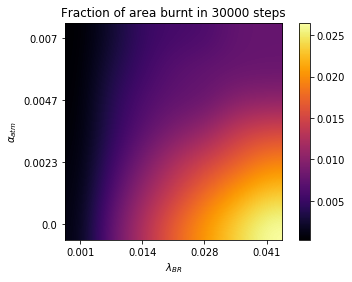

In [33]:
cmap = plt.cm.get_cmap('inferno')
img = plt.imshow(results4/1, cmap=cmap, origin='lower', interpolation='bicubic')

plt.colorbar(img)
skip = 2
plt.xticks(range(0,len(burnX), skip)      , burnX[::skip].round(3))
#plt.yticks(range(0,len(atmosX), skip) , npstr.add(npstr.add('$10^{', np.log10(atmosX[::skip]).astype(str)), '}$'))
plt.yticks(range(0,len(atmosX), skip),atmosX[::skip].round(4))
plt.xlabel('$\lambda_{BR}$')
plt.ylabel(r'$\alpha_{atm}$')
plt.title('Fraction of area burnt in {} steps'.format(nt))

plt.savefig('plots/BR_vs_atmos.pdf')

plt.show()

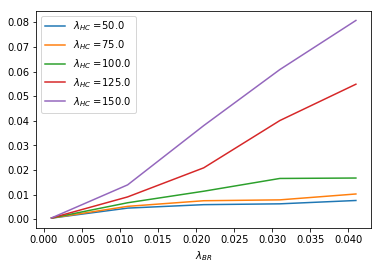

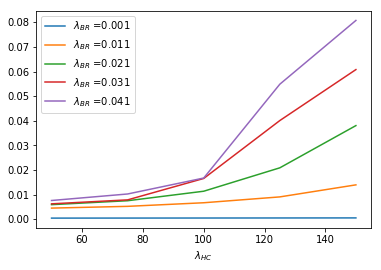

In [24]:
plt.plot(burnX, results2.T)
plt.legend(npstr.add(r'$\lambda_{HC}$ =', heatX.astype(str)))
plt.xlabel(r'$\lambda_{BR}$')
plt.show()
plt.plot(heatX, results2)
plt.legend(npstr.add(r'$\lambda_{BR}$ =', np.round(burnX,3).astype(str)))
plt.xlabel(r'$\lambda_{HC}$')
plt.show()

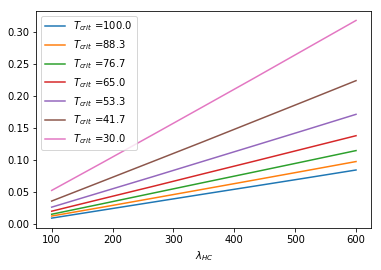

In [65]:
plt.plot(heatContentX, results.T)
plt.legend(npstr.add(r'$T_{crit}$ =', np.round(TcritX,1).astype(str)))
plt.xlabel(r'$\lambda_{HC}$')
plt.show()

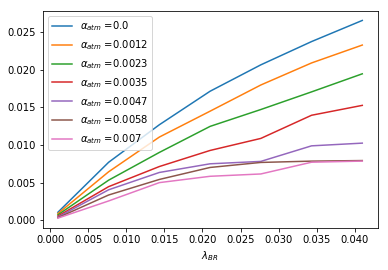

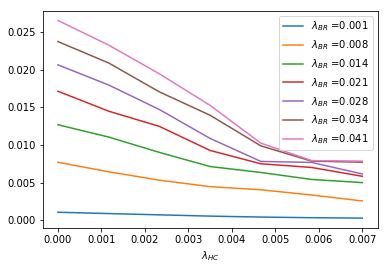

In [35]:
plt.plot(burnX, results4.T)
plt.legend(npstr.add(r'$\alpha_{atm}$ =', atmosX.round(4).astype(str)))
plt.xlabel(r'$\lambda_{BR}$')
plt.show()
plt.plot(atmosX, results4)
plt.legend(npstr.add(r'$\lambda_{BR}$ =', np.round(burnX,3).astype(str)))
plt.xlabel(r'$\lambda_{HC}$')
plt.show()